#**Age Detection of Indian Actors Dataset**

---



---



##**Problem Statement:** 
*This is a fascinating challenge for any deep learning enthusiast. The dataset contains
thousands of images of Indian actors and your task is to identify their age. All the images
are manually selected and cropped from the video frames resulting in a high degree of
variability interms of scale, pose, expression, illumination, age, resolution, occlusion, and
makeup. There are 19,906 images in the training set and 6,636 in the test set.*
**Predict the age of the actors.**

##**Applications of the Project:**
###**1. Electronic Customer Relationship Management**:
ECRM is the use of Internet-based technologies such as websites, emails, forums, and chat rooms, for effective managing of distinguished interactions with clients and individually communicating to them. Customers in different ages may have diverse preferences and expectations of a product. Therefore, companies may use automatic age estimation to monitor market trends and customize their products and services to meet needs and preferences of customers in different age groups. The problem here is how to acquire and analyze substantive personal data from all client groups without infringing on their privacy rights. With automatic age estimation, a camera can snap pictures of clients and automatically estimate their age groups in addition to collection of demographic data.
###**2. Content Access:**
With the proliferation of diverse content in televisions (TV) and the Internet, age estimation can be used to control access to unwanted content to children. A camera could be mounted on a TV to monitor people looking at it such that it switches off the TV if at a particular time unwanted content is streamed and people watching are children.
###**3. Biometrics:**
Age estimation via faces is a soft biometric that can be used to compliment biometric techniques like face recognition, fingerprints, or iris in order to improve recognition, verification, or authentication accuracies. Age estimation can be applied in age-invariant face recognition, iris recognition, hand geometry recognition, and fingerprint recognition in order to improve accuracy of hard (primary) biometric system.

*Our insight towards this project is that we can use modify some features of this project to use it for different purposes like security systems and many others.*

##**Algorithm used:**
Convolutional Neural Network.

*Which inputs an image and as per its training provides an output.*

# **Importing Important Libraries**

In [0]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import pandas as pd
import numpy as np
import os
import random
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
import cv2
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Providing the Path for the train and test images**

In [0]:
a = pd.read_csv("drive/My Drive/Data/train.csv")
b = pd.read_csv("drive/My Drive/Data/test.csv")

train_images = a.iloc[:,0]
trainY = a.iloc[:,1]
test_images = b.iloc[:,0]

In [0]:
#Providing the path 
root_dir = os.path.abspath('.')
data_dir = '/content/drive/My Drive/Data'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

# **Checking the path of the images**

In [0]:
#Checking one random image
i = random.choice(train.index)

img_name = train.ID[i]
img = io.imread(os.path.join(data_dir, 'Trainimg', img_name))

print("Age:" , train.Class[i])


Age: YOUNG


In [0]:
io.imshow(img)

# **Resizing the images in the desired size**

In [0]:
#Calculating the trainX
# "temp.clear()" func is used because when we run the code again and again it will append the resized images again and again to the temp list but by using this ".clear()" func, it clears the previous data present in the temp list
temp.clear()
temp = []
i = 0
# We are resizing all the images to the shape (100,100) using the "resize()" func 
for img_name in train.ID:

  img_path = os.path.join(data_dir, 'Trainimg', img_name)
  img = io.imread(img_path)
  img = resize(img, (100, 100))
  img = img.astype('float32') 
  temp.append(img)

trainX = np.stack(temp)

In [0]:
#Calculating the TestX
temp.clear()
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Testimg', img_name)
    img = io.imread(img_path)
    img = resize(img, (100, 100))
    temp.append(img.astype('float32'))

testX = np.stack(temp)

In [0]:
print(trainX.shape)
print(testX.shape)

(19906, 100, 100, 3)
(6636, 100, 100, 3)


# **One hot encoding and normalizing the images**

In [0]:
# one hot encode target values
trainY = pd.DataFrame(trainY)
TrainY = trainY.replace({'YOUNG': 0, 'MIDDLE': 1,'OLD':2})
TrainY = pd.DataFrame(TrainY)
TrainY
train_Y = to_categorical((TrainY))

In [0]:
# normalize to range 0-1
# by normalizing the images we get rid of the numbers which can make analysis for data more complicated
train_norm = trainX / 255.0
test_norm = testX / 255.0

# **CNN Model**

In [0]:
# Creating the CNN by adding the Conv2D layers and MaxPooling layers 
# We are using "relu" activation func cause we are operating on the images and we dont want to encounter the negative numbers
# At last layer we are using the "Softmax" activation func cause we have one hot encoded our target values
# By this we will get the probability of the result out of 1
# The maximum probability will be decoded and will get the desired output in the classes as "YOUNG","MIDDLE" and "OLD"    
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
# Adadelta optimizer continues to learn even when updates have been done, it doesnt require the initial lr to be declared as well
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
# Printing the summary of the model
model.summary()

In [0]:
# Training our model using the "model.fit()" function
model.fit(trainX, train_Y, epochs=10, batch_size=1000, verbose=0)

# **Saving the Trained model**

In [0]:
model.save('final_model.h5')

# **Predicting the Age of the inputted image**

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load the image
img = load_img('139 resized.jpg', grayscale=False, target_size=(100, 100))
# convert to array
img = img_to_array(img)
# reshape into a single sample
img = img.reshape(1, 100, 100, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

YOUNG


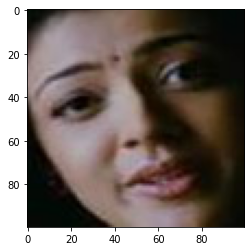

In [0]:
# Loading the model using the function "load_model()"
model = load_model('final_model.h5')
# Using "tf.squeeze()" in order to remove the dimension size "1" from the shape of the img
plt.imshow((tf.squeeze(img)))
# Using "model.predict_classes()" function we are predicting the classes whether it is "YOUNG","MIDDLE","OLD"
Age = model.predict_classes(img)
# As our we have one-hot encoded our target values, we will use if loop to bring the desired output 
if (Age==0):
  print("YOUNG")
elif Age==1:
  print("MIDDLE")
else:
  print("OLD")

##**Summary:**
1. Importing the essential libraries to the code
2. Then we created the path to the images
3. We tested our path by outputting an image from our generated path
4. To perform operations on the images using CNN, they must be of the same size. So we resized train images and test images to the shape of (100,100) 
5. Next we one hot encoded our target variables and normalized our images
6. We created a CNN architecture using Conv2D, MaxPooling and Dense layers
7. We compiled our model using "adadelta" optimizer
8. Then we trained our model by taking 10 epochs and batch-size as 1000
9. After completing the training we saved our model
10. Lastly, We inputted an image into our trained model in order to get the predictions of the age
